# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberto a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno.  
    </b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-danger">

<b>Comentário geral: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Jonathas !😊. Seu projeto já está com uma qualidade excelente. Gostei muito da sua análise temporal, no entanto o projeto exige analise temporal em coortes. Adicionei comentários com dicas de como resolvermos essas análises. Os pontos necessários de ajustes são: 

    - Cálculo de LTV por coortes 
    - Cálculo CAC e ROI por coortes 
    
Boa sorte! Estamos próximos da aprovação!🤞 

Em caso de dúvidas, não hesite em nos perguntar!
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_cost = pd.read_csv('../data/raw_data/costs_us.csv')
df_orders = pd.read_csv('../data/raw_data/orders_log_us.csv')
df_visits = pd.read_csv('../data/raw_data/visits_log_us.csv')

---
### Analizando cost
A tabela costs (dados sobre as despesas com marketing):

- source_id — identificador da origem de anúncio
- dt — data
- costs — despesas com esta origem de anúncio neste dia

#### Mudanças
Tabela dt para data

##### nome novo das colunas
- id
- date
- cost

In [3]:
df_cost.info()
df_cost.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [4]:
# Renomeando as colunas
df_cost.rename(columns={'source_id': 'id', 'dt': 'date', 'df_cost': 'cost'}, inplace=True)

# Convertendo a coluna 'date' para datetime
df_cost['date'] = pd.to_datetime(df_cost['date'])

# Exibindo o resultado
df_cost.info()
df_cost.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      2542 non-null   int64         
 1   date    2542 non-null   datetime64[ns]
 2   costs   2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


,id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


---
### Analizando orders
A tabela orders (dados sobre os pedidos):

- Uid — identificador unívoco do usuário que faz um pedido
- Buy Ts — data e hora do pedido
- Revenue — a receita da Y.Afisha com o pedido

#### Mudanças
Coluna Buy Ts para DateFrame

##### nome novo das colunas
- buy_date
- date
- uid

In [5]:
df_orders.info()
df_orders.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


In [6]:
# Renomeando as colunas
df_orders.rename(columns={'Uid': 'uid', 'Buy Ts': 'buy_date', 'Revenue': 'revenue'}, inplace=True)

# Convertendo a coluna 'buy_date' para datetime
df_orders['buy_date'] = pd.to_datetime(df_orders['buy_date'])

# Exibindo o resultado
df_orders.info()
df_orders.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   buy_date  50415 non-null  datetime64[ns]
 1   revenue   50415 non-null  float64       
 2   uid       50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,buy_date,revenue,uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


---
### Analizando visits
A tabela visits (os logs do servidor com dados sobre os acessos ao site):

- Uid — identificador unívoco do usuário
- Device — dispositivo do usuário
- Start Ts — data e hora do início da sessão
- End Ts — data e hora do final da sessão
- Source Id — identificador da origem do anúncio através do qual o usuário chegou

#### Mudanças
Coluna End ts, start Ts para DateFrame
Coluna devise para category

##### nome novo das colunas
- device
- end_date
- id
- start_date
- uid

In [7]:
df_visits.info()
df_visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [8]:
# Renomeando as colunas
df_visits.rename(columns={'Uid': 'uid', 'Device': 'device', 'Start Ts': 'start_date', 'End Ts': 'end_date', 'Source Id': 'id'}, inplace=True)

# Convertendo as colunas de data para datetime
df_visits['start_date'] = pd.to_datetime(df_visits['start_date'])
df_visits['end_date'] = pd.to_datetime(df_visits['end_date'])

# Convertendo a coluna 'device' para category
df_visits['device'] = df_visits['device'].astype('category')

# Exibindo o resultado
df_visits.info()
df_visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   device      359400 non-null  category      
 1   end_date    359400 non-null  datetime64[ns]
 2   id          359400 non-null  int64         
 3   start_date  359400 non-null  datetime64[ns]
 4   uid         359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


,device,end_date,id,start_date,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [9]:
df_visits.sample(10)


,device,end_date,id,start_date,uid
270851,desktop,2018-02-19 16:24:00,3,2018-02-19 16:23:00,7429898291024689069
256833,desktop,2018-05-08 20:33:00,4,2018-05-08 20:30:00,9667180122685064931
353063,desktop,2017-11-09 10:57:00,5,2017-11-09 10:50:00,10177435178232582482
74130,desktop,2018-05-22 22:29:00,4,2018-05-22 22:19:00,5487571804730661813
341439,desktop,2017-07-03 10:40:00,4,2017-07-03 10:37:00,10437786737823784375
160677,desktop,2018-03-01 13:16:00,5,2018-03-01 13:09:00,9831668406906923813
317952,desktop,2017-09-23 12:55:00,4,2017-09-23 12:41:00,15060945172469457858
56006,desktop,2018-01-04 20:07:00,9,2018-01-04 19:13:00,9575854906022020957
338528,desktop,2017-11-01 11:02:00,2,2017-11-01 10:52:00,1325559509884829971
250080,desktop,2018-05-13 00:18:00,4,2018-05-12 23:51:00,6647792288380815865


Na tabela df_visits teve uma redução no tamanho de 3,4 megas

In [10]:
#Quantas pessoas usam-no cada dia, semana e mês?
# Criando a coluna 'week_start' com a data da segunda-feira daquela semana
df_visits['week_start'] = df_visits['end_date'] - pd.to_timedelta(df_visits['end_date'].dt.weekday, unit='D')
df_visits['week_start'] = df_visits['week_start'].dt.date

# Agrupando por dia (usando apenas a parte da data) e calculando o número de usuários únicos em cada dia
daily_users = df_visits.groupby(df_visits['end_date'].dt.date)['uid'].nunique()
qts_pessoas_dia = daily_users.mean()

# Agrupando por semana (coluna week_start) e calculando o número de usuários únicos em cada semana
weekly_users = df_visits.groupby('week_start')['uid'].nunique()
qts_pessoas_semana = weekly_users.mean()

# Agrupando por mês e calculando o número de usuários únicos em cada mês
monthly_users = df_visits.groupby(df_visits['end_date'].dt.to_period("M"))['uid'].nunique()
qts_pessoas_mes = monthly_users.mean()

# Imprimindo as médias com duas casas decimais
print(f"""O Y.Afisha em média tem:
      - por dia: {qts_pessoas_dia:.0f} pessoas
      - por semana: {qts_pessoas_semana:.0f} pessoas
      - por mês: {qts_pessoas_mes:.0f} pessoas""")


O Y.Afisha em média tem:
      - por dia: 906 pessoas
      - por semana: 5716 pessoas
      - por mês: 21441 pessoas


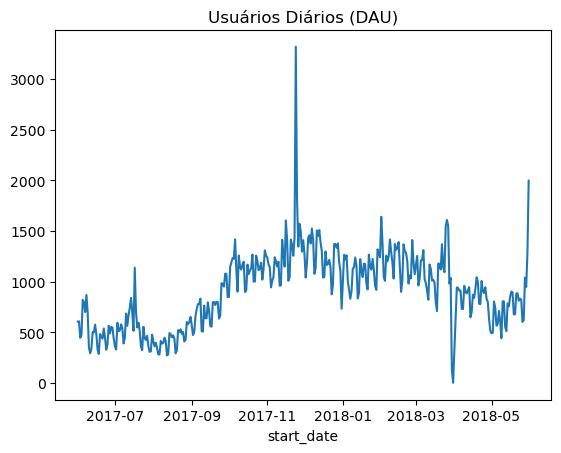

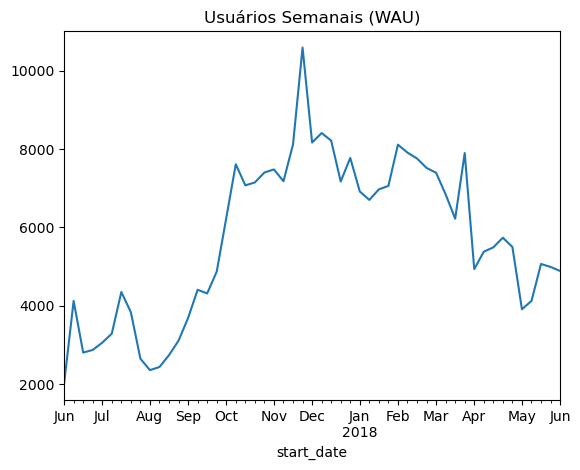

C:\Users\jonat\AppData\Local\Temp\ipykernel_32620\2941514472.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mau = df_visits.resample('M', on='start_date')['uid'].nunique()


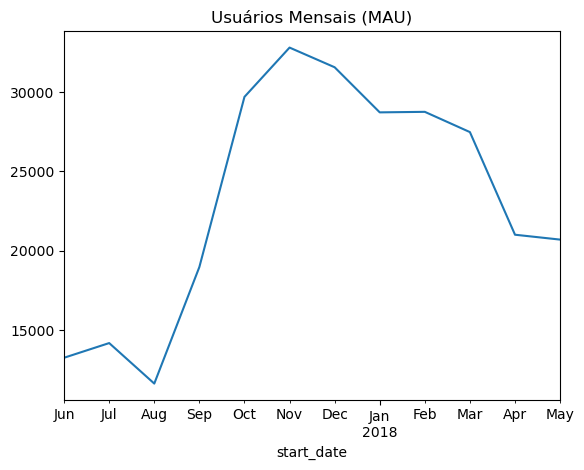

In [11]:
# Uso diário (DAU)
dau = df_visits.groupby(df_visits['start_date'].dt.date)['uid'].nunique()
dau.plot(title='Usuários Diários (DAU)')
plt.show()

# Uso semanal (WAU)
wau = df_visits.resample('W', on='start_date')['uid'].nunique()
wau.plot(title='Usuários Semanais (WAU)')
plt.show()

# Uso mensal (MAU)
mau = df_visits.resample('M', on='start_date')['uid'].nunique()
mau.plot(title='Usuários Mensais (MAU)')
plt.show()

In [12]:
#Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).
# Agrupando por dia (extraindo apenas a data de 'end_date') e contando as sessões
daily_sessions = df_visits.groupby(df_visits['end_date'].dt.date).size()
# Exibindo o número de sessões por dia
print("Sessões por dia:")
print(daily_sessions)
# Se você quiser calcular a média de sessões por dia:
average_sessions = daily_sessions.mean()
print(f"\nMédia de sessões por dia: {average_sessions.mean():.0f}")

Sessões por dia:
end_date
2017-06-01     659
2017-06-02     660
2017-06-03     477
2017-06-04     505
2017-06-05     893
              ... 
2018-05-28    1150
2018-05-29    1040
2018-05-30    1403
2018-05-31    2256
2018-06-01      12
Length: 365, dtype: int64

Média de sessões por dia: 985


In [13]:
985/906 -1

0.08719646799116987

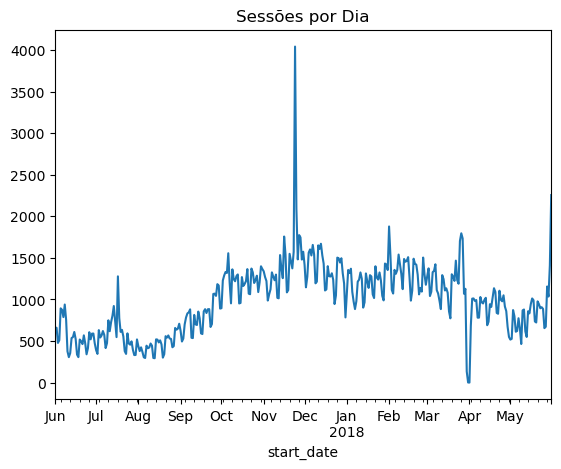

In [14]:
sessoes_dia = df_visits.resample('D', on='start_date').size()
sessoes_dia.plot(title='Sessões por Dia')
plt.show()

Um usuario em media pode fazer 2 sessões porém é raro(8%). 

In [15]:
#Que comprimento tem cada sessão?
t_das_sessões = (df_visits['end_date'] - df_visits['start_date'] ).dt.total_seconds()/60 
print(t_das_sessões)
print()
print(f"O tempo médio das sessões é:{t_das_sessões.mean():.0f}")

0         18.000000
1         28.000000
2          0.000000
3         24.000000
4          0.000000
            ...    
359395     0.316667
359396     0.316667
359397     0.316667
359398     0.316667
359399     0.316667
Length: 359400, dtype: float64

O tempo médio das sessões é:11


<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
- O import das bibliotecas foi feito de forma correta e em uma célula separada
- Os dados foram carregados corretamente.
- Foram utilizados comandos como `head()`e `info()`.
- Bom uso das visualizações gráficas! É uma ótima forma de enriquecer ainda mais a análise exploratória dos dados.
- Aluno adicionou comentários com suas observações osbre os dados.
</div>

In [16]:
#Com que frequência os usuários voltam?

# Ordenar o DataFrame por usuário e data de visita
df_visits = df_visits.sort_values(by=['uid', 'start_date'])

# Agrupar por usuário e selecionar a primeira e segunda visita de cada um
primeira_segunda_visitas = df_visits.groupby('uid').head(2)

# Calcular a diferença de tempo entre a primeira e a segunda visita
primeira_segunda_visitas['time_diff'] = primeira_segunda_visitas.groupby('uid')['start_date'].diff()

# Filtrar apenas as segundas visitas (onde há uma primeira visita anterior)
segundas_visitas = primeira_segunda_visitas.dropna(subset=['time_diff'])

# Calcular a porcentagem de usuários que retornaram da primeira para a segunda visita
porcentagem_retorno_primeira_segunda = (len(segundas_visitas) / df_visits['uid'].nunique()) * 100

print(f"Porcentagem de usuários que retornaram da primeira para a segunda visita: {porcentagem_retorno_primeira_segunda:.0f}%")

Porcentagem de usuários que retornaram da primeira para a segunda visita: 23%


C:\Users\jonat\AppData\Local\Temp\ipykernel_32620\194642880.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primeira_segunda_visitas['time_diff'] = primeira_segunda_visitas.groupby('uid')['start_date'].diff()


In [17]:
# Quando as pessoas começam a comprar?
# 1. Identificar a primeira visita de cada usuário
first_visit = df_visits.groupby('uid')['start_date'].min()

# 2. Identificar a primeira compra de cada usuário
first_purchase = df_orders.groupby('uid')['buy_date'].min()

# 3. Calcular a diferença entre a primeira visita e a primeira compra
# Para garantir que as duas colunas estejam no formato datetime
first_visit = pd.to_datetime(first_visit)
first_purchase = pd.to_datetime(first_purchase)

# Calcular a diferença de dias entre a primeira visita e a primeira compra
days_to_first_purchase = (first_purchase - first_visit).dt.days

def replace_negative_days(x):
    if x >= 0:  # Se o valor for positivo ou zero
        return x  # Mantém o valor original
    else:  # Se o valor for negativo
        return 0  # Substitui por 0
# Se a diferença for 0, será Dia 0; Se for 1, será Dia 1, e assim por diante.
days_to_first_purchase_label = days_to_first_purchase.apply(replace_negative_days)

# Exibir o resultado
print(f"Em media começam a comprar em {days_to_first_purchase_label.mean():.0f} dias")


Em media começam a comprar em 3 dias


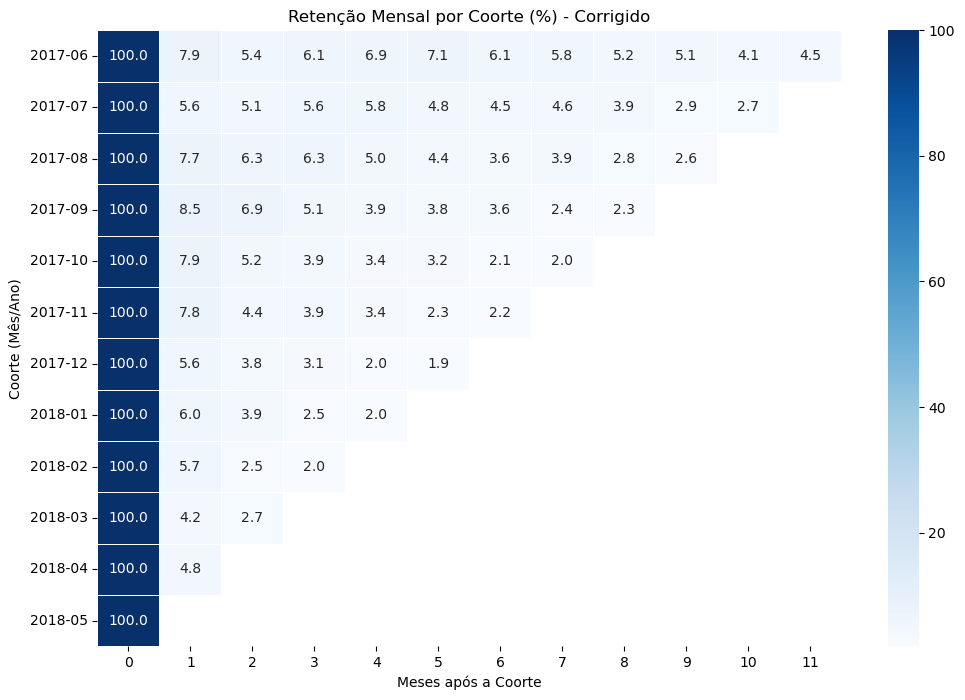

In [18]:

# Criar coluna 'cohort' com o mês do primeiro acesso de cada usuário
df_visits['cohort'] = df_visits.groupby('uid')['start_date'].transform('min').dt.to_period('M')

# Calcular a diferença em meses entre a data da sessão e a coorte
df_visits['month_offset'] = (df_visits['start_date'].dt.to_period('M') - df_visits['cohort']).apply(lambda x: x.n)
# Agrupar por coorte e offset mensal
cohort_data = df_visits.groupby(['cohort', 'month_offset'])['uid'].nunique().reset_index()

# Criar pivot table para visualização
cohort_pivot = cohort_data.pivot_table(index='cohort', columns='month_offset', values='uid', aggfunc='sum')

# Calcular a retenção como porcentagem do mês inicial
cohort_size = cohort_pivot[0]  # Número de usuários no mês 0 (coorte)
retention_matrix = cohort_pivot.divide(cohort_size, axis=0) * 100  # Retenção em %
plt.figure(figsize=(12, 8))
sns.heatmap(
    retention_matrix,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    linewidths=0.5,
    mask=retention_matrix.isnull()
)
plt.title('Retenção Mensal por Coorte (%) - Corrigido')
plt.xlabel('Meses após a Coorte')
plt.ylabel('Coorte (Mês/Ano)')
plt.show()

Dos 23% que voltam a comprar tendem a voltar dps de 3 dias.

<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
Taxa de retenção calculada corretamente.
</div>

In [19]:
# Quantos pedidos os clientes fazem durante um determinado período de tempo?


pedidos_dia = df_orders.groupby(df_orders['buy_date'].dt.date)['uid'].nunique().mean()

# 2. Número médio de pessoas por semana
pedidos_semana = df_orders.groupby(df_orders['buy_date'].dt.isocalendar().week)['uid'].nunique().mean()

# 3. Número médio de pessoas por mês
pedidos_mes = df_orders.groupby(df_orders['buy_date'].dt.to_period('M'))['uid'].nunique().mean()

# Exibir os resultados
print(f"""Pedidos em média :
      - por dia: {pedidos_dia:.0f} pessoas
      - por semana: {pedidos_semana:.0f} pessoas
      - por mês: {pedidos_mes:.0f} pessoas""")


Pedidos em média :
      - por dia: 128 pessoas
      - por semana: 833 pessoas
      - por mês: 3155 pessoas


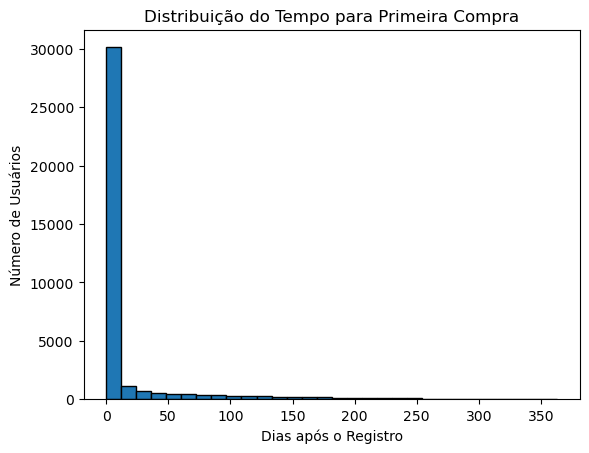

In [20]:
# Primeiro acesso e primeira compra por usuário
primeiro_acesso = df_visits.groupby('uid')['start_date'].min().reset_index()
primeira_compra = df_orders.groupby('uid')['buy_date'].min().reset_index()

# Combinar dados e calcular diferença
df_conversao = pd.merge(primeiro_acesso, primeira_compra, on='uid', how='inner')
df_conversao['dias_conversao'] = (df_conversao['buy_date'] - df_conversao['start_date']).dt.days

# Distribuição do tempo de conversão
plt.hist(df_conversao['dias_conversao'], bins=30, edgecolor='k')
plt.title('Distribuição do Tempo para Primeira Compra')
plt.xlabel('Dias após o Registro')
plt.ylabel('Número de Usuários')
plt.show()

In [21]:
# Qual é o volume médio de uma compra?

volume_medio_compra = df_orders['revenue'].mean()
volume_mediano_compra = df_orders['revenue'].median()


print(f"""O volume médio de uma compra é: {volume_medio_compra:.2f}
O volume mediano de uma compras é: {volume_mediano_compra:.2f}""")

O volume médio de uma compra é: 5.00
O volume mediano de uma compras é: 2.50


Média de 5 e mediana de 2,50 indicam que 50% gastam até 2,50, enquanto alguns clientes com valores altos elevam a média.

In [22]:
# Quanto dinheiro eles trazem para a empresa (LTV)?


# Definir margem bruta
margem_bruta = 0.3

# Calcular o LTV, excluindo valores zero e nulos
ltv = (
    df_orders.groupby('uid')['revenue']
    .sum()                           # Soma da receita por usuário
    .replace(0.0, pd.NA)             # Substitui zeros por NA (para excluir)
    .dropna()                        # Remove todos os NA (zeros e nulos originais)
    * margem_bruta                   # Aplica a margem bruta
)

# Calcular o LTV médio ajustado
ltv_ajustado = ltv.mean()

# Resultados
print(f"""O LTV (excluindo clientes sem receita) é: 
{ltv}

O valor médio que um cliente traz (considerando apenas compradores) é: {ltv_ajustado:.2f}""")




O LTV (excluindo clientes sem receita) é: 
uid
313578113262317          0.165
1575281904278712         0.915
2429014661409475        21.999
2464366381792757         0.732
2551852515556206         3.297
                         ...  
18445147675727495770     0.915
18445407535914413204     0.264
18445601152732270159     1.266
18446156210226471712     2.934
18446167067214817906     2.382
Name: revenue, Length: 36509, dtype: object

O valor médio que um cliente traz (considerando apenas compradores) é: 2.07


<div class="alert alert-block alert-danger">
<b> Comentário: </b> <a class="tocSkip"></a>
    
A análise LTV também deve ser feita por coorte.  Semelhante ao cálculo de retenção que você fez anteriormente.

Exemplo: 
    
```python 
#calculando a quantidade de dinheiro que o usuários trazem para a empresa (lifetime value)

#derivando a coluna first_order_month
first_orders = first_order.copy()
first_orders['first_order_month'] = first_orders['first_order_date'].dt.to_period('M')

#calculando o número de clientes, por mês da primeira compra
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index())
cohort_sizes.columns = ['first_order_month', 'n_buyers']

margin_rate = 0.4

#mesclando as informações de pedidos com a primeira compra por cliente
df_orders_ = pd.merge(df_orders, fi..continue o código

#calculando a receita por coorte e mês
cohorts = (
    df_orders_.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index())

#mesclando o tamanho da coorte com a receita
report = pd.merge(cohort_sizes,...continue o código

```
    
Exemplo de output:
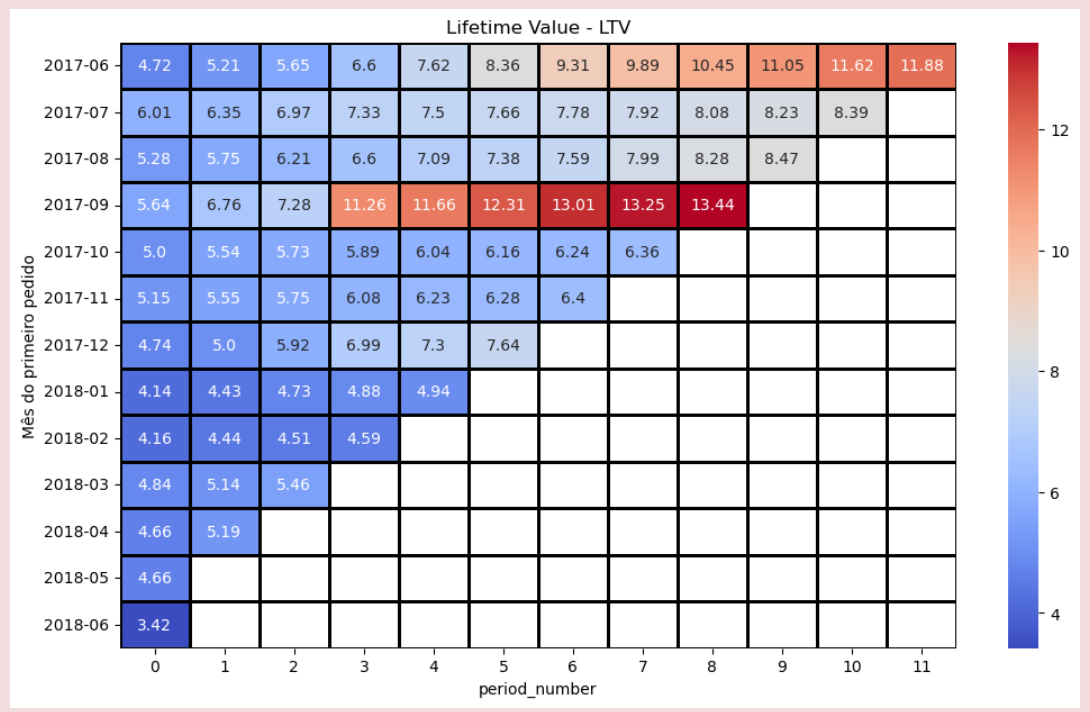    


</div>

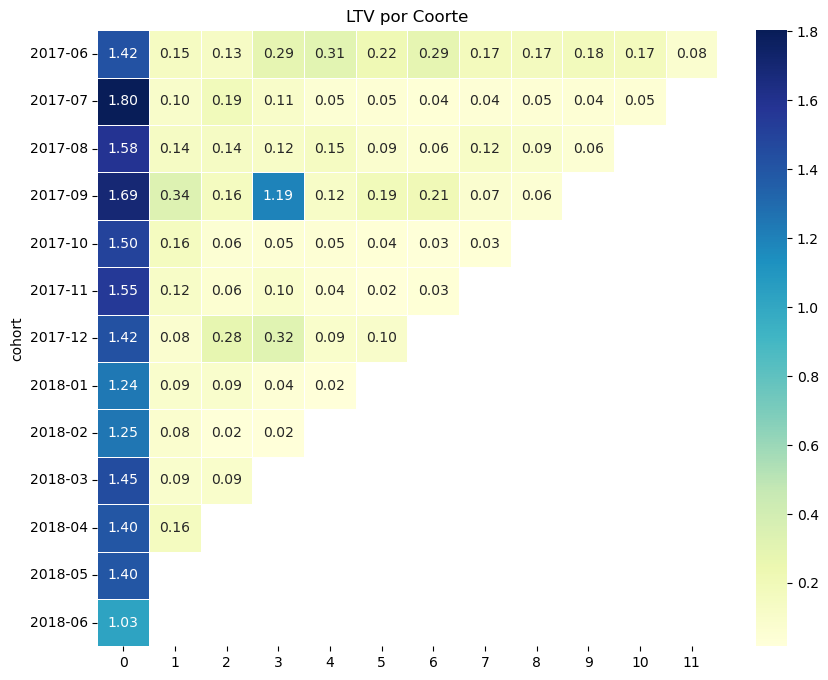

In [23]:
df_orders['first_order_date'] = df_orders.groupby('uid')['buy_date'].transform('min')

# Criar a coluna 'cohort' (Coorte da primeira compra)
df_orders['cohort'] = df_orders['first_order_date'].dt.to_period('M')
df_cost['cohort'] = df_cost['date'].dt.to_period('M')


# Adicionar a coluna 'order_month' (Mês da compra)
df_orders['order_month'] = df_orders['buy_date'].dt.to_period('M')


# Calcular o LTV por coorte
cohorts = df_orders.groupby(['cohort', 'order_month']).agg({'revenue': 'sum'}).reset_index()
cohort_sizes = df_orders.groupby('cohort').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['cohort', 'n_buyers']
report = pd.merge(cohort_sizes, cohorts, on='cohort')


report['ltv'] = report['revenue'] * margem_bruta / report['n_buyers']

# Criar a pivot table do LTV
ltv_pivot = report.pivot_table(index='cohort', columns=(report['order_month'] - report['cohort']).apply(lambda x: x.n), values='ltv')

# Plotagem do Heatmap LTV
plt.figure(figsize=(10, 8))
sns.heatmap(ltv_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('LTV por Coorte')
plt.show()

Em toda sua vida um cliente gasta em média 2.07, levando em conta uma margem bruta de 30%.

In [24]:
#Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo

# 1. Total de dinheiro gasto
total_cost = df_cost['costs'].sum()
print(f"Total de dinheiro gasto: {total_cost:.2f}")

# 2. Dinheiro gasto por origem (ID)
cost_by_id = df_cost.groupby('id')['costs'].sum().reset_index()
print("\nDinheiro gasto por origem (ID):")
print(cost_by_id)

# 3. Dinheiro gasto ao longo do tempo
df_cost['date'] = pd.to_datetime(df_cost['date'])  # Garantir que a coluna 'date' seja do tipo datetime
cost_over_time = df_cost.groupby('date')['costs'].sum().reset_index()
print("\nDinheiro gasto ao longo do tempo:")
print(cost_over_time)

Total de dinheiro gasto: 329131.62

Dinheiro gasto por origem (ID):
   id      costs
0   1   20833.27
1   2   42806.04
2   3  141321.63
3   4   61073.60
4   5   51757.10
5   9    5517.49
6  10    5822.49

Dinheiro gasto ao longo do tempo:
          date    costs
0   2017-06-01   735.26
1   2017-06-02   721.19
2   2017-06-03   450.85
3   2017-06-04   761.16
4   2017-06-05   821.44
..         ...      ...
359 2018-05-27   532.87
360 2018-05-28   619.44
361 2018-05-29   784.79
362 2018-05-30  1183.00
363 2018-05-31  2153.70

[364 rows x 2 columns]


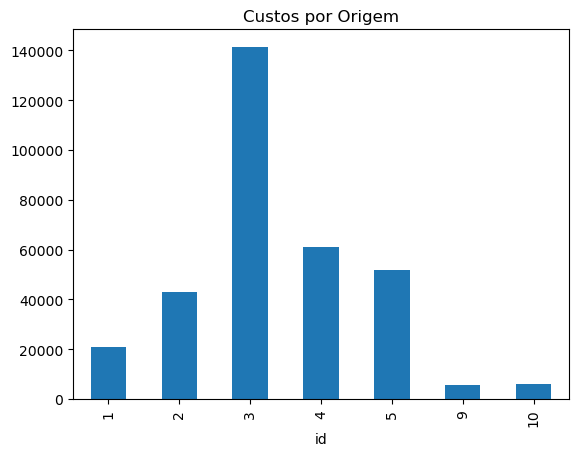

In [25]:
custos_por_origem = df_cost.groupby('id')['costs'].sum()
custos_por_origem.plot(kind='bar', title='Custos por Origem')
plt.show()

In [26]:
#Quanto custou a aquisição de clientes para cada origem?
clientes_por_origem = df_visits.groupby('id')['uid'].nunique().reset_index()
clientes_por_origem.columns = ['id', 'num_clientes']

# Juntar com df_cost para obter o custo total por origem
custo_por_origem = df_cost.groupby('id')['costs'].sum().reset_index()

# Calcular o CAC por origem
cac_por_origem = pd.merge(custo_por_origem, clientes_por_origem, on='id')
cac_por_origem['CAC'] = cac_por_origem['costs'] / cac_por_origem['num_clientes']

# Exibir o resultado
print("Custo de Aquisição de Clientes (CAC) por origem:")
print(cac_por_origem[['id', 'CAC']])

Custo de Aquisição de Clientes (CAC) por origem:
   id       CAC
0   1  1.096546
1   2  1.631017
2   3  1.890439
3   4  0.731201
4   5  0.908434
5   9  0.595584
6  10  0.721766


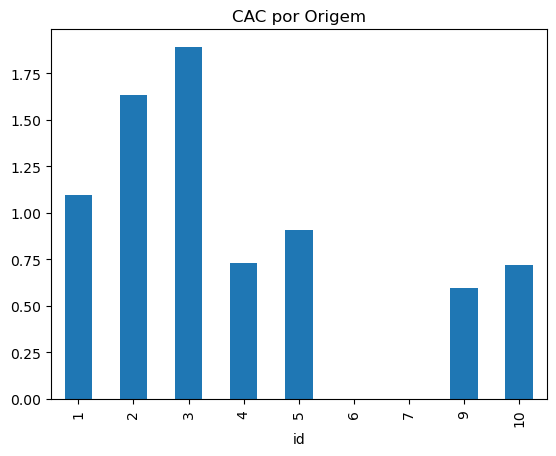

In [27]:
# Usuários adquiridos por origem (primeiro acesso)
usuarios_por_origem = df_visits.groupby('id')['uid'].nunique()

# CAC por origem
cac = custos_por_origem / usuarios_por_origem
cac.plot(kind='bar', title='CAC por Origem')
plt.show()

In [28]:
#Os investimentos valeram a pena? (ROI)
# 1. Calcular o custo total de aquisição
custo_total = df_cost['costs'].sum()
print(f"Custo total de aquisição: {custo_total:.2f}")

# 2. Calcular a receita total gerada
receita_total = df_orders['revenue'].sum()
print(f"Receita total gerada: {receita_total:.2f}")

# 3. Calcular o ROI
roi = (receita_total - custo_total) / custo_total * 100
print(f"ROI: {roi:.2f}%")

# 4. Verificar se o investimento valeu a pena
if roi > 0:
    print("O investimento valeu a pena! (ROI positivo)")
else:
    print("O investimento não valeu a pena. (ROI negativo)")

Custo total de aquisição: 329131.62
Receita total gerada: 252057.20
ROI: -23.42%
O investimento não valeu a pena. (ROI negativo)


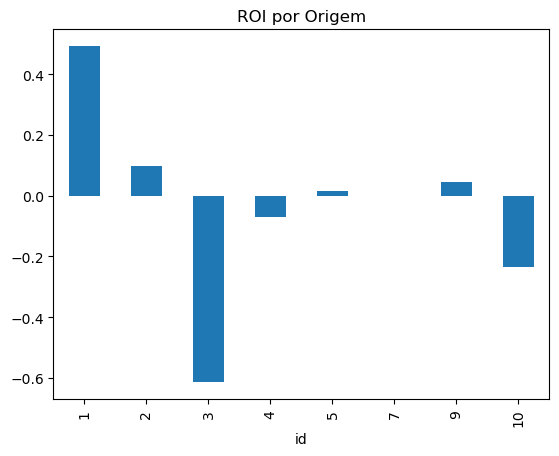

In [29]:
# Receita por origem (considerando primeiro acesso)
usuarios_compra = df_visits.drop_duplicates('uid').merge(df_orders, on='uid')
receita_por_origem = usuarios_compra.groupby('id')['revenue'].sum()
roi = (receita_por_origem - custos_por_origem) / custos_por_origem
roi.plot(kind='bar', title='ROI por Origem')
plt.show()

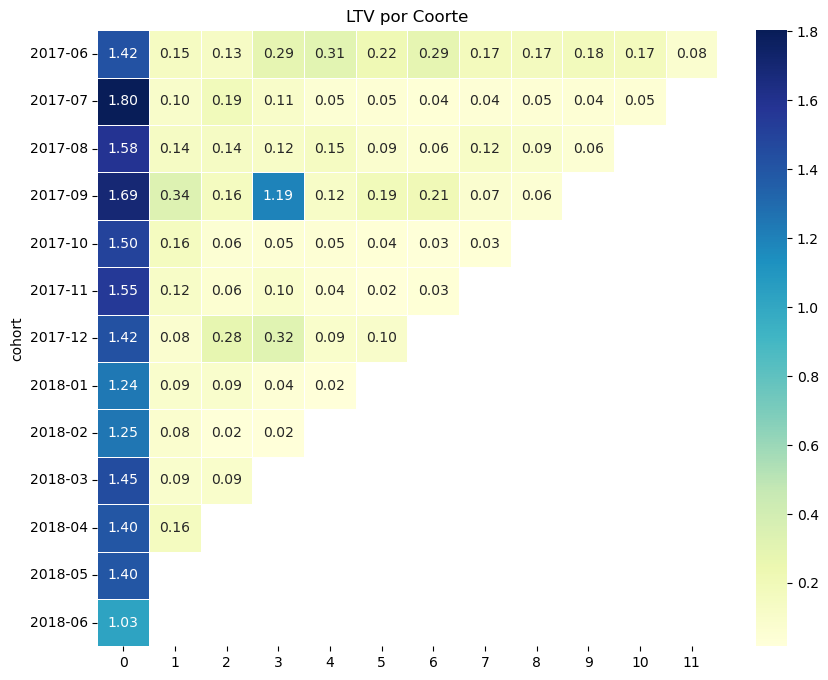

In [30]:
# Calcular o CAC por coorte
# Agrupe os custos por coorte e some os custos
cohort_costs = df_cost.groupby('cohort')['costs'].sum().reset_index()
# Renomeie a coluna 'uid' para 'n_buyers' para corresponder a cohort_sizes
cohort_sizes = cohort_sizes.rename(columns={'uid': 'n_buyers'})

# Mescle os custos e tamanhos das coortes com base no mês da primeira compra
cac_report = pd.merge(cohort_sizes, cohort_costs, on='cohort',how='left')

# Calcule o CAC para cada coorte
cac_report['cac'] = cac_report['costs'] / cac_report['n_buyers']


# Calcular o ROMI por coorte

romi_report = report.groupby('cohort').agg({'ltv': 'sum', 'n_buyers': 'nunique','revenue': 'sum'}).reset_index()
romi_report.columns = ['cohort', 'ltv', 'n_buyers','revenue']
# Mescle os custos das coortes para poder calcular o ROMI
romi_report = pd.merge(romi_report, cohort_costs, on='cohort',how='left')

romi_report['cac'] = romi_report['costs'] / romi_report['n_buyers']

#calcular ROMI
romi_report['romi'] = romi_report['ltv'] / romi_report['cac']


# Criar a pivot table do ROMI
romi_pivot = romi_report.pivot_table(index='cohort', columns=(report['order_month'] - report['cohort']).apply(lambda x: x.n), values='romi')


# ... (código para plotar o heatmap do ROMI)



# Plotagem do Heatmap LTV
plt.figure(figsize=(10, 8))
sns.heatmap(ltv_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('LTV por Coorte')
plt.show()

<div class="alert alert-block alert-danger">
<b> Comentário: </b> <a class="tocSkip"></a>

    
Aqui também precisamos calcular o `ROI` / `ROMI` por cohort, pois os grupos podem ter valores diferentes de `LTV` e isso pode influenciar no resultado final. O cálculo da métrica pode ser feito como algo assim:
    
```python
your_agg_df['romi'] = your_agg_df['ltv'] / your_agg_df['cac']
```

O resultado pode ser apresentado como uma `pivot_table` por `cohort`, conforme você fez para outros indicadores em seu projeto. Adicionalmente, você pode analisar o `ROMI` por origem.
    
```markdown
|                   |      |    |    |   |   |   |   |   |   |   |    |    |
|-------------------|------|----|----|---|---|---|---|---|---|---|----|----|
| cohort            | 0    | 1  | 2  | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 |
| first_order_month |      |    |    |   |   |   |   |   |   |   |    |    |
| 2017-06           | 0.53 | .. | .. |   |   |   |   |   |   |   |    |    |
| 2017-07           | 0.63 | .. |    |   |   |   |   |   |   |   |    |    |
| 2017-08           | 0.49 | .. |    |   |   |   |   |   |   |   |    |    |
| 2017-09           | 0.60 |    |    |   |   |   |   |   |   |   |    |    |
| 2017-10           | 0.60 |    |    |   |   |   |   |   |   |   |    |    |
| 2017-11           | 0.55 |    |    |   |   |   |   |   |   |   |    |    |
| 2017-12           | 0.54 |    |    |   |   |   |   |   |   |   |    |    |
| 2018-01           | 0.42 |    |    |   |   |   |   |   |   |   |    |    |
| 2018-02           | 0.46 |    |    |   |   |   |   |   |   |   |    |    |
| 2018-03           | 0.56 |    |    |   |   |   |   |   |   |   |    |    |
| 2018-04           | 0.48 |    |    |   |   |   |   |   |   |   |    |    |
| 2018-05           | 0.63 |    |    |   |   |   |   |   |   |   |    |    |
```

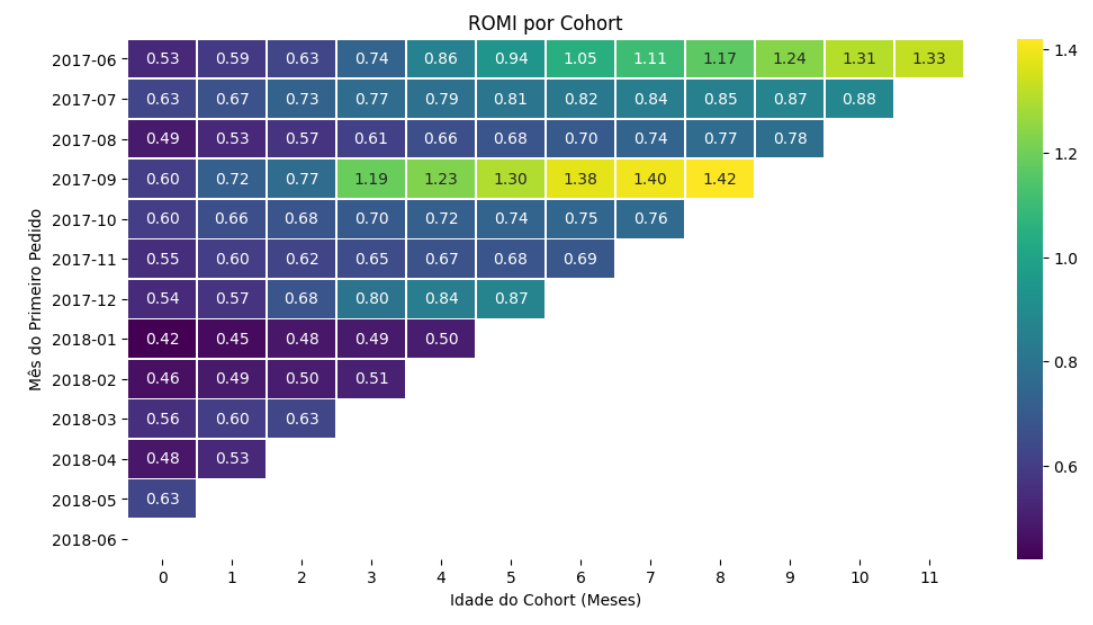

</div>

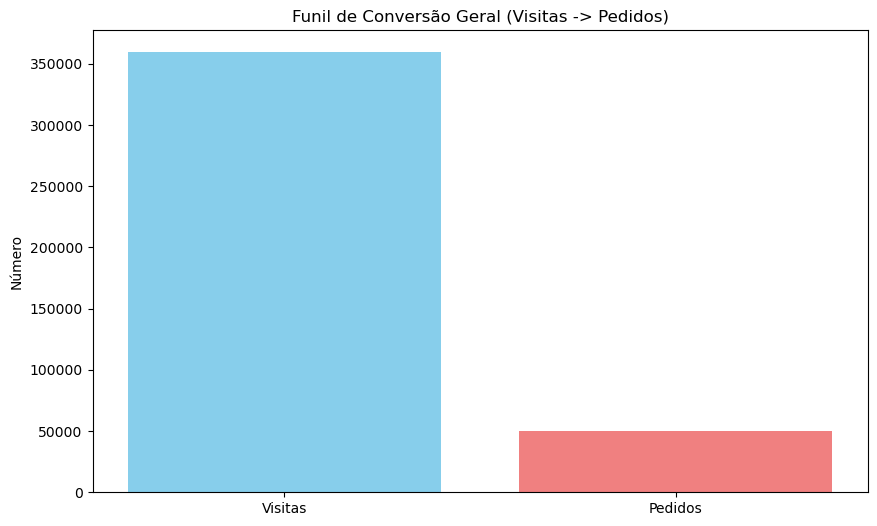

In [31]:
total_visits = len(df_visits)
total_orders = len(df_orders)
conversion_rate_geral = (total_orders / total_visits) * 100

visits_por_origem = df_visits.groupby('id')['uid'].nunique()
orders_por_origem = df_orders.merge(df_visits[['uid', 'id']], on='uid').groupby('id')['uid'].count()
conversion_rate_por_origem = (orders_por_origem / visits_por_origem) * 100

plt.figure(figsize=(10, 6))
plt.bar(['Visitas', 'Pedidos'], [total_visits, total_orders], color=['skyblue', 'lightcoral'])
plt.title('Funil de Conversão Geral (Visitas -> Pedidos)')
plt.ylabel('Número')
plt.show()


## Conclusão e Recomendações para a Estratégia de Marketing da Y.Afisha

**Sumário Executivo:**

A análise de marketing da Y.Afisha revela que, apesar de uma base de usuários engajada, o **ROI geral das campanhas de marketing é negativo (-23.42%)**.  Isso indica que os gastos com marketing superam a receita gerada, sinalizando a necessidade urgente de otimização da estratégia.

**Recomendações Estratégicas:**

1.  **Redução do Orçamento de Marketing:**
    *   **Justificativa:** O ROI negativo demonstra que o investimento atual não é sustentável. Reduzir o orçamento geral é crucial para evitar maiores perdas financeiras.
    *   **Ação:**  Recomendamos uma **redução conservadora no orçamento total de marketing**, reavaliando os gastos em cada canal para maximizar a eficiência com recursos limitados.

2.  **Realocação Estratégica de Recursos para Canais de Baixo CAC:**
    *   **Justificativa:** As origens **9 e 10** apresentam o menor Custo de Aquisição de Cliente (CAC), indicando maior eficiência na conversão de usuários em clientes a um custo menor.
    *   **Ação:**  **Aumentar o investimento nas origens 9 e 10**, que demonstraram ser os canais mais custo-efetivos. Explorar e otimizar ainda mais esses canais pode gerar um melhor retorno sobre o investimento.

3.  **Reavaliação e Otimização de Canais de Alto CAC:**
    *   **Justificativa:** As origens **2 e 3** apresentam os CACs mais altos e, portanto, são menos eficientes no momento.
    *   **Ação:**
        *   **Investigar e otimizar as campanhas nas origens 2 e 3:** Analisar detalhadamente as estratégias de marketing nesses canais para identificar pontos de ineficiência e oportunidades de melhoria. Isso pode incluir a revisão de segmentação de público, criativos de anúncios, e páginas de destino.
        *   **Considerar a suspensão ou redução drástica do investimento:** Se a otimização não apresentar resultados significativos em um período determinado, recomenda-se **suspender ou reduzir drasticamente o investimento nesses canais**, direcionando os recursos para origens mais promissoras.

4.  **Foco na Melhoria do Engajamento e Valor da Compra:**
    *   **Justificativa:** Apesar da boa retenção inicial, a curta duração das sessões e o baixo volume médio de compra limitam o LTV dos clientes.
    *   **Ação:**
        *   **Aumentar o engajamento nas sessões:** Implementar estratégias para aumentar o tempo de permanência dos usuários no site ou aplicativo, como melhorias na experiência do usuário, conteúdo mais atraente e recomendações personalizadas.
        *   **Incentivar compras de maior valor:** Desenvolver táticas para aumentar o valor médio das compras, como promoções para compras acima de um determinado valor, ofertas de pacotes, ou destaque de produtos de maior receita.

**Métricas Chave e Justificativas:**

*   **ROI (Retorno sobre Investimento):**  Métrica primordial para avaliar a rentabilidade geral do investimento em marketing. O ROI negativo (-23.42%) sinaliza que a estratégia atual não é economicamente viável.
*   **CAC (Custo de Aquisição de Cliente):** Essencial para entender a eficiência de cada canal de marketing. A priorização de canais com CAC mais baixo (9 e 10) visa otimizar o custo por cliente adquirido.
*   **LTV (Lifetime Value):**  Importante para medir o valor a longo prazo de cada cliente. Aumentar o LTV, mesmo que o CAC seja mantido, pode melhorar a rentabilidade geral. As ações recomendadas para aumentar o engajamento e o valor da compra visam diretamente este aumento do LTV.
*   **DAU/WAU/MAU e Retenção:** Indicam o engajamento da base de usuários. Embora os números sejam relativamente bons, a otimização da experiência do usuário pode aumentar ainda mais o engajamento e, consequentemente, a conversão e a receita.
*   **Tempo de Sessão:**  A curta duração média das sessões (11 minutos) sugere que há espaço para melhorar a experiência do usuário e o engajamento dentro das sessões, com o objetivo de aumentar a conversão e o valor da compra.
*   **Tempo até a Primeira Compra:** O curto período de 3 dias sugere um potencial de conversão rápida. As campanhas de marketing podem ser otimizadas para capitalizar essa janela de oportunidade e incentivar a primeira compra de novos usuários.
*   **Volume Médio de Compra e Mediana:**  O baixo volume médio e mediana indicam a necessidade de estratégias para aumentar o valor das transações, o que impactará diretamente na receita e no LTV.

**Conclusão Final:**

É imperativo que a Y.Afisha adote uma abordagem mais estratégica e focada em resultados para suas campanhas de marketing. A realocação do orçamento para canais mais eficientes, combinada com esforços para melhorar o engajamento do usuário e o valor da compra, são passos cruciais para reverter o ROI negativo e construir uma estratégia de marketing sustentável e lucrativa a longo prazo. A monitorização contínua das métricas chave e a realização de testes A/B para otimizar as campanhas são fundamentais para o sucesso futuro.

<div class="alert alert-success">
<strong>Comentário</strong>

Conclusão muito boa fundamentada em dados.
</div>